
## Аналитика в Яндекс.Афише 📃
 
* Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. 

------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------
## Данные 💾

Данные для первой части
Файл /datasets/hypothesis.csv. Скачать датасет
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши (/datasets/visits_log.csv.),
* выгрузка всех заказов за этот период (/datasets/orders_log.csv.),
* статистика рекламных расходов (/datasets/costs_log.csv.).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Описание данных 📱

#### Таблица visits (лог сервера с информацией о посещениях сайта):
* Uid — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Start Ts — дата и время начала сессии
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь
#### Таблица orders (информация о заказах):
* Uid — уникальный id пользователя, который сделал заказ
* Buy Ts — дата и время заказа
* Revenue — выручка Яндекс.Афиши с этого заказа
#### Таблица costs (информация о затратах на маркетинг):
* source_id — идентификатор рекламного источника
* dt — дата
* costs — затраты на этот рекламный источник в этот день
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Цель  проекта 🎯
* Помочь маркетологам оптимизировать маркетинговые затраты.
* Сделать рекомендацию по эффективным источникам/платформам.



## Оглавление: 

##   [Загрузка и предобработка данных](#step1)
* [Обработка VISITS](#step1.1)
* [Обработка ORDERS](#step1.2)
* [Обработка COSTS](#step1.3)
## [Отчёты и метрики](#step2)
### [Продукт](#step2.1)
* [Сколько людей пользуются в день, неделю, месяц?](#step2.1.1)
* [Сколько сессий в день?](#step2.1.2)
* [Сколько длится одна сессия?](#step2.1.3)
* [Как часто люди возвращаются?](#step2.1.4)
### [Продажи](#step2.2)
* [Когда люди начинают покупать?](#step2.2.1)
* [Сколько раз покупают за период?](#step2.2.2)
* [Какой средний чек?](#step2.2.3)
* [Сколько денег приносят? (LTV)](#step2.2.4)
### [Маркетинг](#step2.3)
* [Сколько денег потратили? Всего / на каждый источник / по времени](#step2.3.1)
* [Сколько стоило привлечение одного покупателя из каждого источника?](#step2.3.2)
* [На сколько окупились расходы? (ROI)](#step2.3.3)
### [Рекомендуемые платформы/источники (ВЫВОД)](#step3)


# Загрузка и предобработка данных <a id="step1"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### Обработка первого датасета VISITS <a id="step1.1"></a>

In [2]:
visits=pd.read_csv('/datasets/visits_log.csv')

In [3]:
display(visits.head(10))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
print('Дубликатов в датафрейме visits:',visits.duplicated().sum())

Дубликатов в датафрейме visits: 0


In [6]:
#Переименуем столбцы (уберём пробелы и приведём к нижнему регистру)
visits=visits.rename(columns={'Device' : 'device', 'End Ts' : 'end_ts', 'Source Id' : 'source_id', 'Start Ts' : 'start_ts', 'Uid' : 'uid'})


In [7]:
visits.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [8]:
#Переведём столбцы с началом сессий в формат даты
visits['end_ts']=pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")

In [9]:
#Переведём столбцы с окончанием сессий в формат даты
visits['start_ts']=pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")

In [10]:
visits.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [11]:
#Посмотрим наличие отрицательных сессий
visits['session_time']=visits['end_ts']>visits['start_ts']

In [12]:
visits['session_time'].value_counts()

True     323604
False     35796
Name: session_time, dtype: int64

In [13]:
#Уберём отрицательные сессии
visits=visits.query('end_ts>start_ts')

In [14]:
visits['session_time'].isnull().sum()

0

In [15]:
visits['session_time'].value_counts()

True    323604
Name: session_time, dtype: int64

In [16]:
visits['session_duration']=visits['end_ts']-visits['start_ts']

In [17]:
visits['session_duration'].dt.seconds

0         1080
1         1680
3         1440
5           60
6         3360
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: session_duration, Length: 323604, dtype: int64

In [18]:
visits['session_duration'].isnull().sum()

0

### Обработка второго датасета ORDERS <a id="step1.2"></a>

In [19]:
orders=pd.read_csv('/datasets/orders_log.csv')

In [20]:
display(orders.head(10))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [22]:
#Проверим на дубликаты
print('Дубликатов в датафрейме orders:',orders.duplicated().sum())

Дубликатов в датафрейме orders: 0


In [23]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [24]:
#Переименуем столбцы (уберём пробелы и приведём к нижнему регистру)
orders=orders.rename(columns={'Uid' : 'uid','Buy Ts' : 'buy_ts', 'Revenue' : 'revenue' })


In [25]:
#Переведём столбцы с датой покупки в формат даты
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Обработка третьего датасета COSTS <a id="step1.3"></a>

In [27]:
costs=pd.read_csv('/datasets/costs.csv')

In [28]:
display(costs.head(10))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [29]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [30]:
#Проверим на дубликаты
print('Дубликатов в датафрейме costs:',costs.duplicated().sum())

Дубликатов в датафрейме costs: 0


In [31]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [32]:
#Переведём столбцы с датой покупки в формат даты
costs['dt']=pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [33]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Отчёты и метрики <a id="step2"></a>

## Продукт <a id="step2.1"></a>


### Сколько людей пользуются в день, неделю, месяц? <a id="step2.1.1"></a>

In [34]:
#Сколько людей пользуются в день, неделю, месяц?
#Сделаем столбец с длительностью сессий
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
#Сделаем столбцы с датой использования
visits['date'] = visits['start_ts'].dt.date
visits['day_number'] = visits['start_ts'].dt.day
#Сделаем столбцы с неделей, месяцем и годом начала использования
visits['week'] = pd.DatetimeIndex(visits['start_ts']).week
visits['month'] = pd.DatetimeIndex(visits['start_ts']).month
visits['year'] = pd.DatetimeIndex(visits['start_ts']).year
#Сделаем столбцы с днём недели и месяцем
visits['week_number'] = visits['start_ts'].dt.week
visits['day_of_week'] = visits['start_ts'].dt.day_name()
visits['month_name'] = visits['start_ts'].dt.month_name()
#DAU (daily active users) — количество уникальных пользователей в день
dau = visits.groupby(['date']).agg({'uid':'nunique'}).mean()

#WAU (weekly active users) — количество уникальных пользователей в неделю
wau = visits.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()

#MAU (monthly active users) — количество уникальных пользователей в месяц
mau = visits.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()

#Выведем получившийся результат
print('Пользователей в день: {} '.format(int(dau)))
print('Пользователей в неделю: {} '.format(int(wau)))
print('Пользователей в месяц: {} '.format(int(mau)))



Пользователей в день: 817 
Пользователей в неделю: 5148 
Пользователей в месяц: 20955 


In [35]:
#Рассчитаем Sticky Factor - показатель лояльности/вовлечённости аудитории к приложению
sticky_wau = dau / wau
sticky_mau = dau / mau
print('Лояльность/вовлечённость за неделю: {:.2%}'.format(sticky_wau[0]))
print('Лояльность/вовлечённость за месяц: {:.2%}'.format(sticky_mau[0]))


Лояльность/вовлечённость за неделю: 15.88%
Лояльность/вовлечённость за месяц: 3.90%


In [36]:

dau_dynamic = visits.groupby(['date']).agg({'uid':'nunique'})


wau_dynamic = visits.groupby(['year', 'week']).agg({'uid':'nunique'})

mau_dynamic = visits.groupby(['year', 'month']).agg({'uid':'nunique'})


In [37]:
wau_dynamic.head()

uid
year week      
2017 22    1816
     23    3700
     24    2514
     25    2565
     26    2728

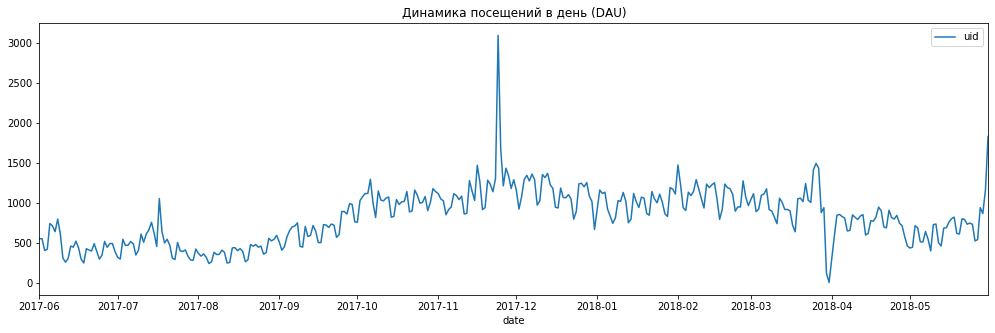

In [38]:
dau_dynamic.plot( figsize = (17,5), title = 'Динамика посещений в день (DAU)');

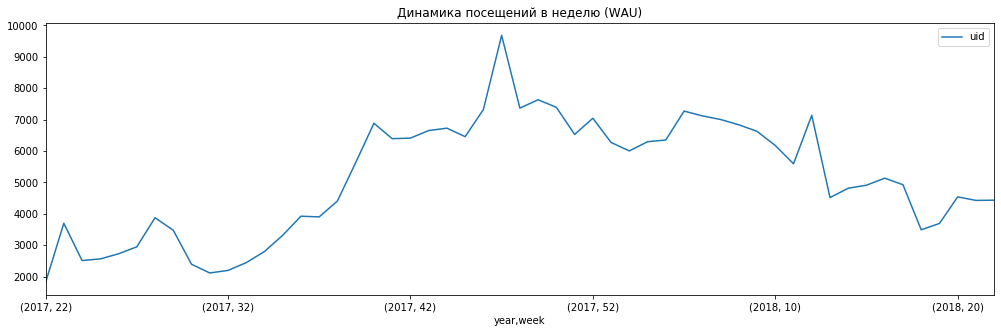

In [39]:
wau_dynamic.plot(figsize = (17,5), title = 'Динамика посещений в неделю (WAU)');

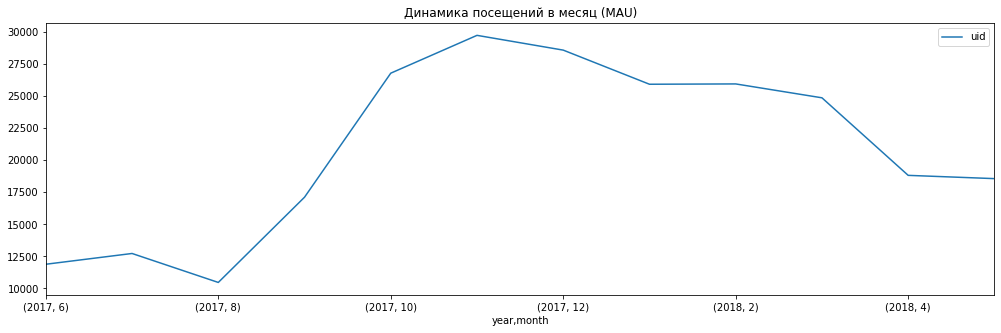

In [40]:

mau_dynamic.plot(figsize = (17,5), title = 'Динамика посещений в месяц (MAU)');

In [41]:
visits_desktop=visits.query('device=="desktop"')
visits_touch=visits.query('device=="touch"')
#DAU (daily active users) — количество уникальных пользователей в день
dau_d = visits_desktop.groupby(['date']).agg({'uid':'nunique'}).mean()
dau_t = visits_touch.groupby(['date']).agg({'uid':'nunique'}).mean()
#WAU (weekly active users) — количество уникальных пользователей в неделю
wau_d = visits_desktop.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()
wau_t = visits_touch.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()
#MAU (monthly active users) — количество уникальных пользователей в месяц
mau_d = visits_desktop.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()
mau_t = visits_touch.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()
#Выведем получившийся результат
print('Пользователи стационарных устройств:')
print('Пользователей в день: {} '.format(int(dau_d)))
print('Пользователей в неделю: {} '.format(int(wau_d)))
print('Пользователей в месяц: {} '.format(int(mau_d)))
print()
print()
print('Пользователи мобильных устройств')
print('Пользователей в день: {} '.format(int(dau_t)))
print('Пользователей в неделю: {} '.format(int(wau_t)))
print('Пользователей в месяц: {} '.format(int(mau_t)))

Пользователи стационарных устройств:
Пользователей в день: 599 
Пользователей в неделю: 3756 
Пользователей в месяц: 15239 


Пользователи мобильных устройств
Пользователей в день: 221 
Пользователей в неделю: 1433 
Пользователей в месяц: 5999 


In [42]:
#Рассчитаем Sticky Factor - показатель лояльности/вовлечённости аудитории к приложению
sticky_wau_d = dau_d / wau_d
sticky_mau_d = dau_d / mau_d
print('Пользователи стационарных устройств:')
print('Лояльность/вовлечённость за неделю: {:.2%}'.format(sticky_wau_d[0]))
print('Лояльность/вовлечённость за месяц: {:.2%}'.format(sticky_mau_d[0]))
print()
print()
sticky_wau_t = dau_t / wau_t
sticky_mau_t = dau_t / mau_t
print('Пользователи мобильных устройств')
print('Лояльность/вовлечённость за неделю: {:.2%}'.format(sticky_wau_t[0]))
print('Лояльность/вовлечённость за месяц: {:.2%}'.format(sticky_mau_t[0]))

Пользователи стационарных устройств:
Лояльность/вовлечённость за неделю: 15.96%
Лояльность/вовлечённость за месяц: 3.94%


Пользователи мобильных устройств
Лояльность/вовлечённость за неделю: 15.44%
Лояльность/вовлечённость за месяц: 3.69%


In [43]:
dau_dynamic_d = visits_desktop.groupby(['date']).agg({'uid':'nunique'})
wau_dynamic_d = visits_desktop.groupby(['year', 'week']).agg({'uid':'nunique'})
mau_dynamic_d = visits_desktop.groupby(['year', 'month']).agg({'uid':'nunique'})

dau_dynamic_t = visits_touch.groupby(['date']).agg({'uid':'nunique'})
wau_dynamic_t = visits_touch.groupby(['year', 'week']).agg({'uid':'nunique'})
mau_dynamic_t = visits_touch.groupby(['year', 'month']).agg({'uid':'nunique'})


In [ ]:
dau_dynamic_d.plot( figsize = (17,5), title = 'Динамика посещений в день СТАЦИОНАРНЫЕ (DAU)')
dau_dynamic_t.plot( figsize = (17,5), title = 'Динамика посещений в день МОБИЛЬНЫЕ (DAU)');

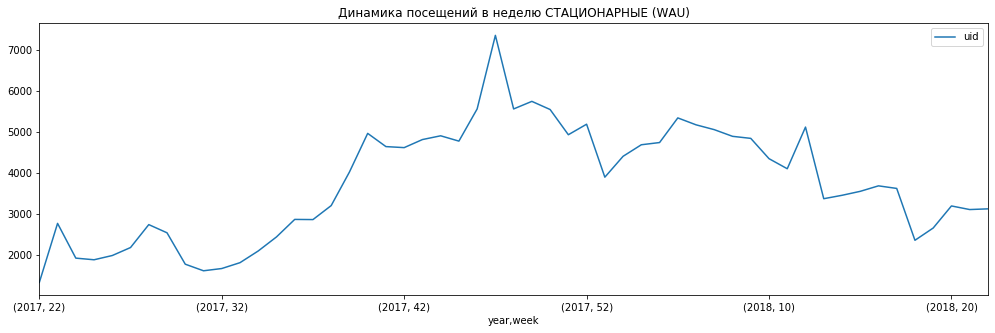

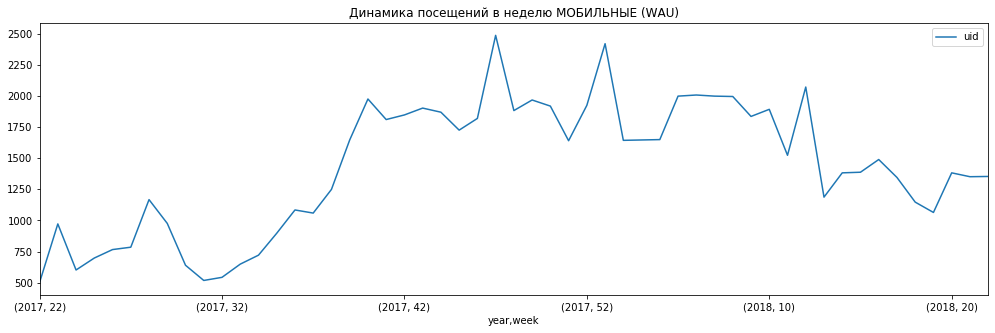

In [45]:
wau_dynamic_d.plot( figsize = (17,5), title = 'Динамика посещений в неделю СТАЦИОНАРНЫЕ (WAU)')
wau_dynamic_t.plot( figsize = (17,5), title = 'Динамика посещений в неделю МОБИЛЬНЫЕ (WAU)');

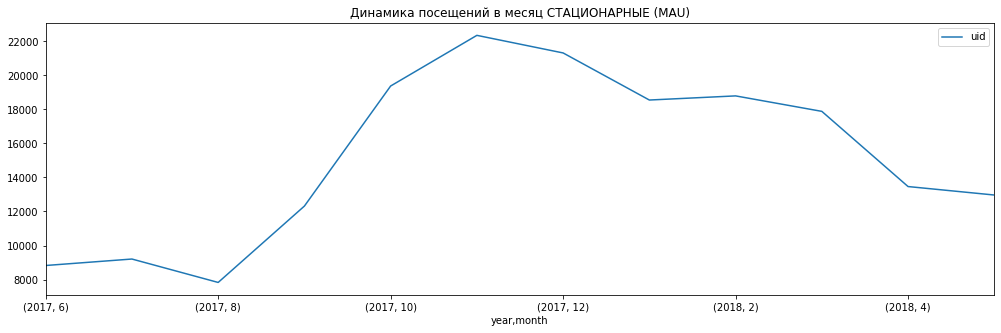

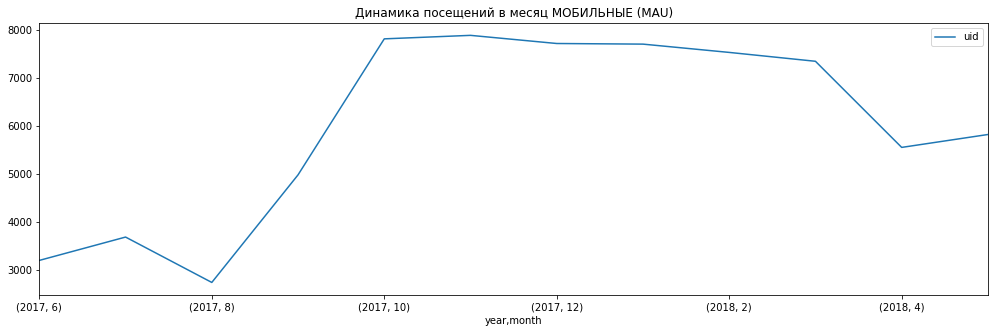

In [46]:
mau_dynamic_d.plot( figsize = (17,5), title = 'Динамика посещений в месяц СТАЦИОНАРНЫЕ (MAU)')
mau_dynamic_t.plot( figsize = (17,5), title = 'Динамика посещений в месяц МОБИЛЬНЫЕ (MAU)');

* Прослеживается сезонность посещений Афиши (высокий период с сентября по январь, низкий период в летнее время)
* В декабре есть период аномальной активности, 3090 пользователей против обычных ~780. Необходимо направить в отдел маркетинга эту аномалию, это может быть промо активность, либо громкая премьера (в тот период шли "Движение вверх" , "Джуманджи" и "Новые ёлки"
* Также есть спад пользовательской активности в апреле, его также необходимо проверить. Возможно были технические работы на платформе.
* По типу устройства динамика и сезонность повторяются, разница лишь в количестве, мобильных пользователей в 3 раза меньше

### Сколько сессий в день? <a id="step2.1.2"></a>

In [47]:
day_visits = visits.groupby(['date']).agg({'uid':'count'})
print('Сессий в день в среднем: {}'.format(int(day_visits.mean()[0])))

Сессий в день в среднем: 889


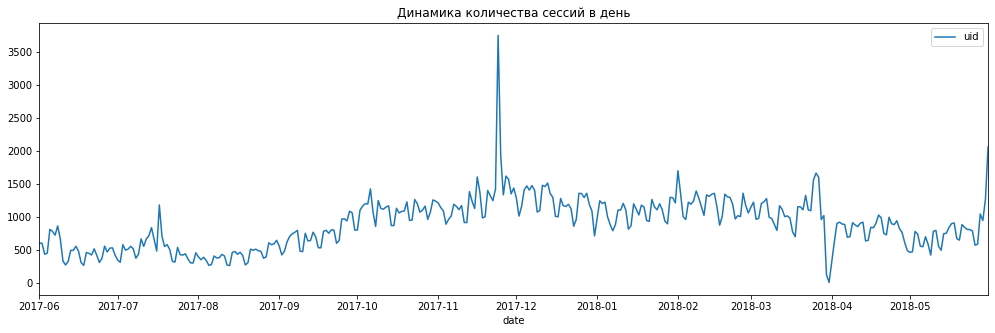

In [48]:
day_visits.plot(figsize = (17,5), title = 'Динамика количества сессий в день');

In [49]:
day_visits.describe()

,uid
count,364.000000
mean,889.021978
std,383.086457
min,1.000000
25%,575.000000
50%,898.000000
75%,1153.750000
max,3755.000000


* Видно, что аномальные значения в декабре и апреле также отразились на количестве посещений в эти периоды.


### Сколько длится одна сессия? <a id="step2.1.3"></a>

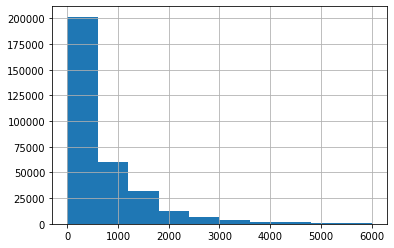

In [50]:
#Сделаем столбец с длительностью сессий и изучим его
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['duration'].hist(bins=10, range=(0, 6000))
plt.show()



In [51]:
print('Длительность сессии - среднее: {}'.format(int(visits['duration'].mean())))
print('Длительность сессии - медиана: {}'.format(int(visits['duration'].median())))
print('Длительность сессии - мода: {}'.format(int(visits['duration'].mode())))


Длительность сессии - среднее: 714
Длительность сессии - медиана: 360
Длительность сессии - мода: 60


In [52]:
desktop_visits=visits.query('device=="desktop"')
touch_visits=visits.query('device=="touch"')

In [53]:
#Посмотрим сколько длится сессия на ПК и ноутбуках
print('Длительность сессии на стационарных устройствах - среднее: {}'.format(int(desktop_visits['duration'].mean())))
print('Длительность сессии на стационарных устройствах - медиана: {}'.format(int(desktop_visits['duration'].median())))
print('Длительность сессии на стационарных устройствах - мода: {}'.format(int(desktop_visits['duration'].mode())))


Длительность сессии на стационарных устройствах - среднее: 773
Длительность сессии на стационарных устройствах - медиана: 420
Длительность сессии на стационарных устройствах - мода: 60


In [54]:
#Посмотрим сколько длится сессия на смартфонах и планшетах
print('Длительность сессии на мобильных устройствах - среднее: {}'.format(int(touch_visits['duration'].mean())))
print('Длительность сессии на мобильных устройствах - медиана: {}'.format(int(touch_visits['duration'].median())))
print('Длительность сессии на мобильных устройствах - мода: {}'.format(int(touch_visits['duration'].mode())))

Длительность сессии на мобильных устройствах - среднее: 548
Длительность сессии на мобильных устройствах - медиана: 240
Длительность сессии на мобильных устройствах - мода: 60


In [55]:
visits['duration'].describe()

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: duration, dtype: float64

In [56]:
#Поскольку распределение неравномерно, возьмём моду для расчёта типичной длительности сессии
session_mean = visits['duration'].mode()
print('Средняя длительность сессии: {} секунд'.format(session_mean[0]))

Средняя длительность сессии: 60 секунд


* И на стационарных и на мобильных устройствах чаще всего встречается время сессии, равное 60 секунд
* При этом на стационарных устройствах чаще встречаются длительные сессии

### Как часто люди возвращаются? <a id="step2.1.4"></a>

In [57]:
#Сгруппируем по первуму визиту новый дф
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [58]:
#Объеденим с основным
visits = visits.merge(first_visit)
visits.head()

,device,end_ts,source_id,start_ts,uid,session_time,session_duration,duration,date,day_number,week,month,year,week_number,day_of_week,month_name,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,True,00:18:00,1080,2017-12-20,20,51,12,2017,51,Wednesday,December,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,True,00:28:00,1680,2018-02-19,19,8,2,2018,8,Monday,February,2018-02-19 16:53:00
2,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,True,00:24:00,1440,2018-05-20,20,20,5,2018,20,Sunday,May,2018-03-09 20:05:00
3,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,True,00:28:00,1680,2018-03-09,9,10,3,2018,10,Friday,March,2018-03-09 20:05:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,True,00:01:00,60,2017-09-03,3,35,9,2017,35,Sunday,September,2017-09-03 21:35:00


In [59]:
#Сделаем столбцы с первым месяцем визита и просто месяцем визита
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [60]:
#Создадим столбец с продолжительностью использования
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [61]:
#Разделим по когортам 
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
f_uid.columns = ['first_visit_month', 'f_uid']

f_uid

,first_visit_month,f_uid
0,2017-06-01,11885
12,2017-07-01,11825
23,2017-08-01,9214
33,2017-09-01,15125
42,2017-10-01,23538
50,2017-11-01,24852
57,2017-12-01,23030
63,2018-01-01,20573
68,2018-02-01,20173
72,2018-03-01,18793


In [62]:

cohort_visits = cohort_visits.merge(f_uid)
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['f_uid']
retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

retention_pivot.mean() * 100


lifetime
0     100.000000
1       6.380662
2       4.473203
3       4.161192
4       3.912892
5       3.757675
6       3.579616
7       3.610285
8       3.468773
9       3.392884
10      3.258829
11      4.392091
dtype: float64

In [63]:
del retention_pivot[0]

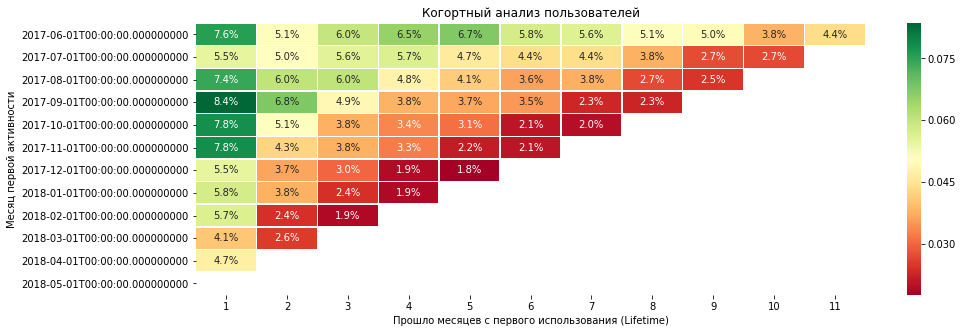

In [64]:
plt.figure(figsize=(15, 5))
plt.title('Когортный анализ пользователей')
sns.heatmap(retention_pivot, vmin=None, vmax=None, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первого использования (Lifetime)')
plt.show()

### Вывод:
* После первого месяца использования очень мало людей продолжают использовать на ежемесячной основе.
* Возвращается очень маленький процент людей и с течением времени он падает.

## Продажи <a id="step2.2"></a>



### Когда люди начинают покупать? <a id="step2.2.1"></a>


In [65]:
#найдём время и дату первых сессий 
first_sessions = visits.groupby(['uid']).agg({'start_ts':'min', 'source_id':'first'})
first_sessions.columns = ['first_activity', 'first_source']

#найдем время первой покупки
first_orders = orders.groupby(['uid']).agg({'buy_ts':'min'})
first_orders.columns = ['first_buy_ts']

#добавим дату и время первой сессии в информацию по первым заказам
first_orders = first_orders.join(first_sessions,on='uid')

Медиана времени первой покупки: 15 минут
Среднее времени первой покупки: 15 дней
Мода времени первой покупки: 1 минута


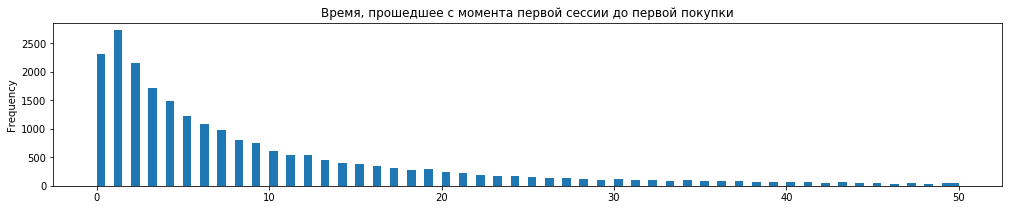

In [66]:
#найдем время, прошедшее с момента первой сессии до первой покупки
first_orders['time_to_first_purchase'] = (first_orders['first_buy_ts'] - first_orders['first_activity']) / np.timedelta64(1, 'm')
first_orders['time_to_first_purchase'].plot(kind = 'hist', bins = 100, range = (0,50), figsize = (17,3), title = 'Время, прошедшее с момента первой сессии до первой покупки')
print('Медиана времени первой покупки: {} минут'.format(int(first_orders['time_to_first_purchase'].median())))
print('Среднее времени первой покупки: {} дней'.format(int(first_orders['time_to_first_purchase'].mean()/60/24)))
print('Мода времени первой покупки: {} минута'.format(int(first_orders['time_to_first_purchase'].mode())))


### Вывод:
* Покупки обычно происходят сразу после первой сессии



### Сколько раз покупают за период? <a id="step2.2.2"></a>

In [67]:
#добавим в orders дату первого заказа и выведем в отдельный столбец месяц первого заказа
orders = orders.join(first_orders, on='uid')


In [68]:
orders['first_buy_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['first_session_month'] = orders['first_activity'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [69]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_year'] = orders['buy_ts'].dt.year
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'buy_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'buy_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'buy_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'buy_ts':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}

'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32




In [70]:
purchase_by_month = (orders.merge(visits, on='uid', how='inner')).groupby(['buy_month', 'device']).agg({'buy_ts':'count'})

In [71]:
purchase_by_month.reset_index()

,buy_month,device,buy_ts
0,2017-06-01,desktop,23085
1,2017-06-01,touch,1396
2,2017-07-01,desktop,30737
3,2017-07-01,touch,1763
4,2017-08-01,desktop,32919
5,2017-08-01,touch,1181
6,2017-09-01,desktop,59364
7,2017-09-01,touch,2224
8,2017-10-01,desktop,64058
9,2017-10-01,touch,5481


In [72]:
month_name_list = ['Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', \
             'Декабрь', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май']

In [73]:
purchase_by_month_pivot=purchase_by_month.pivot_table(index='buy_month', columns='device', values='buy_ts', aggfunc='mean')

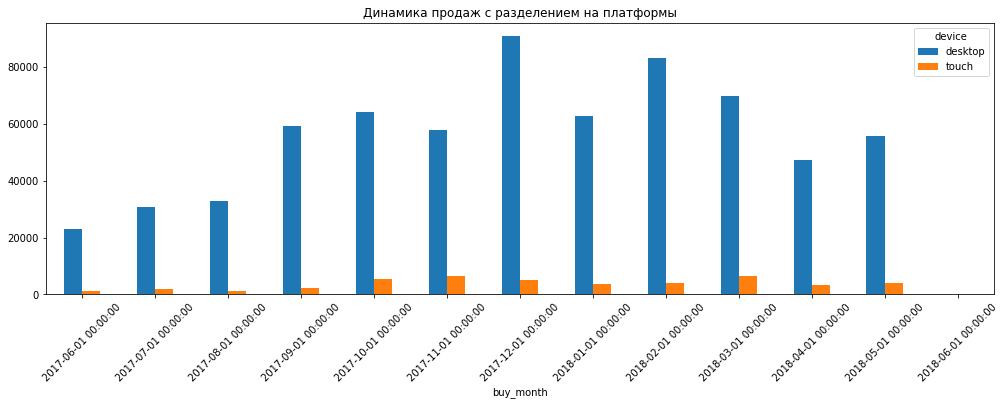

In [74]:
purchase_by_month_pivot.plot(kind='bar', figsize = (17,5), title = 'Динамика продаж с разделением на платформы', rot=45);

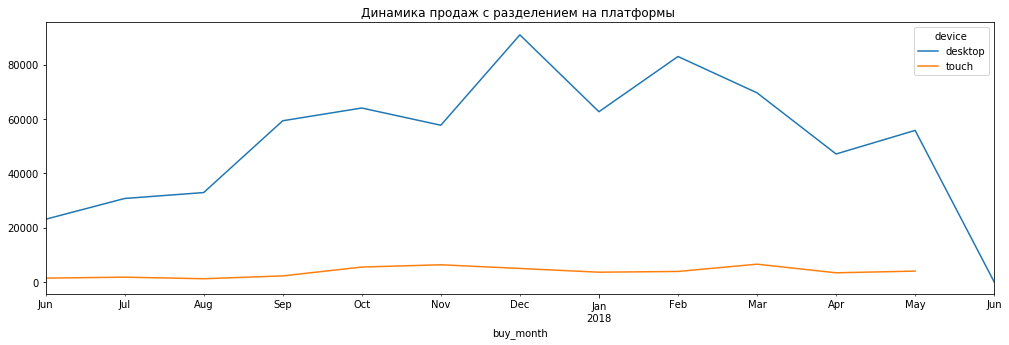

In [75]:
purchase_by_month_pivot.plot(figsize = (17,5), title = 'Динамика продаж с разделением на платформы ');

### Вывод:
* Обычно пользователи совершают 1 заказ.
* Но если смотреть на покупки за год, то видно, что увеличивается значение повторных покупок.
* Динамика покупок подтверждает сезонность, выявленную ранее
* Стационарные устройства значительно популярнее мобильных при просмотре "Яндекс.Афиши"

### Какой средний чек? <a id="step2.2.3"></a>

In [76]:
#Покупок мало, сделаем когортный анализ по количеству покупок на человека - когорты выведем по дате первой сессии
orders = orders[['uid', 'revenue', 'buy_ts', 'buy_month', 'first_buy_ts', 'first_buy_month', 'first_session_month']]


In [77]:
orders

,uid,revenue,buy_ts,buy_month,first_buy_ts,first_buy_month,first_session_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-01,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-01,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-01,2018-05-31 23:54:00,2018-05-01,2018-05-01
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-01,2018-05-31 23:56:00,2018-05-01,2017-10-01


In [153]:
#orders_lifetime=orders.query('first_buy_month > first_session_month') 

In [79]:
orders['buy_month'].isnull().sum()

0

In [80]:
orders['buy_month'].describe()

count                   50415
unique                     13
top       2017-12-01 00:00:00
freq                     6218
first     2017-06-01 00:00:00
last      2018-06-01 00:00:00
Name: buy_month, dtype: object

In [81]:
orders['buy_month']=pd.to_datetime(orders['buy_month'], format="%Y-%m-%d %H:%M:%S")

In [82]:
orders['buy_month']=orders['buy_month'].astype('datetime64[M]')

In [83]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
uid                    50415 non-null uint64
revenue                50415 non-null float64
buy_ts                 50415 non-null datetime64[ns]
buy_month              50415 non-null datetime64[ns]
first_buy_ts           50415 non-null datetime64[ns]
first_buy_month        50415 non-null datetime64[ns]
first_session_month    49941 non-null datetime64[ns]
dtypes: datetime64[ns](5), float64(1), uint64(1)
memory usage: 2.7 MB


In [84]:
orders['first_session_month'].isnull().sum()

474

In [85]:
orders=orders.dropna()

In [86]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49941 entries, 0 to 50414
Data columns (total 7 columns):
uid                    49941 non-null uint64
revenue                49941 non-null float64
buy_ts                 49941 non-null datetime64[ns]
buy_month              49941 non-null datetime64[ns]
first_buy_ts           49941 non-null datetime64[ns]
first_buy_month        49941 non-null datetime64[ns]
first_session_month    49941 non-null datetime64[ns]
dtypes: datetime64[ns](5), float64(1), uint64(1)
memory usage: 3.0 MB


In [151]:
orders.head()

,uid,revenue,buy_ts,buy_month,first_buy_ts,first_buy_month,first_session_month,lifetime_orders,age_cohort
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0 days,0
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days,0
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0 days,0
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0 days,0
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0 days,0


In [152]:
#посчитаем lifetime заказов
orders['lifetime_orders'] = ((orders.loc[:,'buy_month'] - orders.loc[:,'first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
orders['lifetime_orders']

0        0
1        0
2        0
3        0
4        0
        ..
50410    0
50411    0
50412    0
50413    0
50414    0
Name: lifetime_orders, Length: 49941, dtype: int64

In [90]:
orders['lifetime_orders'].isnull().sum()

0

In [91]:
#сгруппируем заказы по когортам и lifetime и высчитаем кол-во покупок и пользователей
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_orders']).agg({'uid':['count', 'nunique']}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_orders', 'n_orders', 'n_users']

#получим количество заказов на одного пользователя по каждой когорте и каждому lifetime
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['first_session_month'] = orders_grouped_by_cohorts['first_session_month'].dt.strftime('%Y-%m')

#создадим сводную таблицу с когортным анализом количества заказов на пользователя 
cohorts = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_orders', values = 'orders_per_user', aggfunc = 'mean')
cohorts['mean'] = cohorts.mean(axis=1)

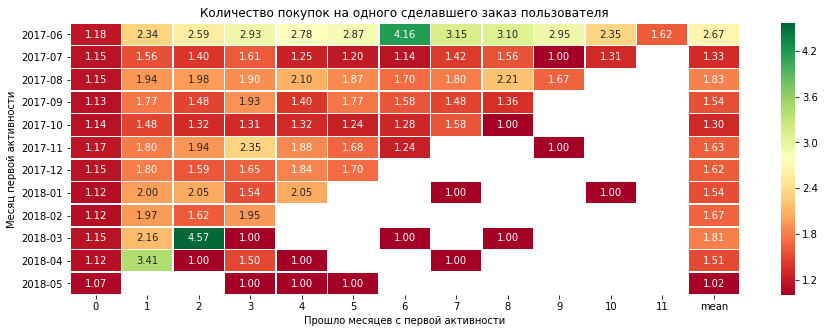

In [92]:
plt.figure(figsize=(15, 5))
plt.title('Количество покупок на одного сделавшего заказ пользователя')
sns.heatmap(cohorts, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности')
plt.show()


Text(113.99999999999999, 0.5, 'Месяц первой активности')

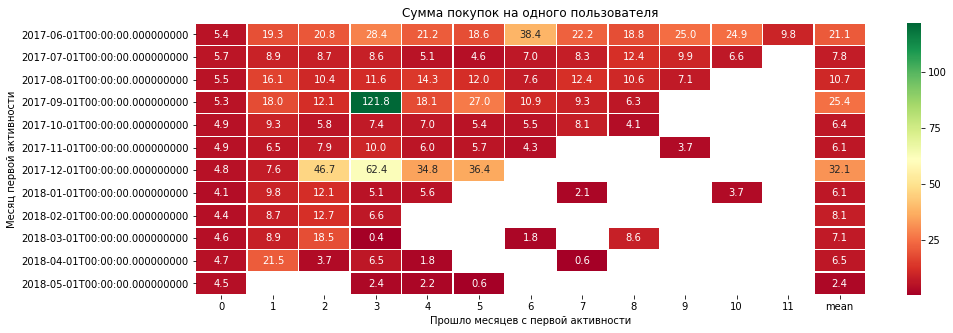

In [93]:
#сгруппируем заказы по когортам и lifetime и суммам покупок на одного пользователя
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_orders']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_orders', 'revenue_total', 'n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_total'] / orders_grouped_by_cohorts['n_users']


#создадим сводную таблицу с когортным анализом суммы покупок на пользователя 
cohorts_revenue_per_user = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_orders', values = 'revenue_per_user', aggfunc = 'mean')
cohorts_revenue_per_user['mean'] = cohorts_revenue_per_user.mean(axis=1)

plt.figure(figsize=(15, 5))
plt.title('Сумма покупок на одного пользователя')
sns.heatmap(cohorts_revenue_per_user, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности')




In [94]:
orders

,uid,revenue,buy_ts,buy_month,first_buy_ts,first_buy_month,first_session_month,lifetime_orders
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-01,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-01,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-01,2018-05-31 23:54:00,2018-05-01,2018-05-01,0
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-01,2018-05-31 23:56:00,2018-05-01,2017-10-01,0


In [95]:
mean_revenue_cohorts = orders.groupby(['first_buy_month', 'lifetime_orders']).agg({'revenue':'sum', 'uid':'nunique', 'buy_ts': 'count'}).reset_index()
mean_revenue_cohorts.columns = ['first_buy_month', 'lifetime_orders', 'revenue_total', 'n_users', 'n_orders']
mean_revenue_cohorts['mean_revenue'] = mean_revenue_cohorts['revenue_total'] / mean_revenue_cohorts['n_orders']


In [96]:
mean_revenue_cohorts

,first_buy_month,lifetime_orders,revenue_total,n_users,n_orders,mean_revenue
0,2017-06-01,0,9443.50,2003,2333,4.047793
1,2017-06-01,1,981.82,61,177,5.547006
2,2017-06-01,2,885.34,50,174,5.088161
3,2017-06-01,3,1931.30,54,226,8.545575
4,2017-06-01,4,2068.58,88,292,7.084178
...,...,...,...,...,...,...
74,2018-03-01,2,1114.87,58,176,6.334489
75,2018-04-01,0,10492.17,2244,2463,4.259915
76,2018-04-01,1,1209.92,69,195,6.204718
77,2018-05-01,0,13687.07,2942,3202,4.274538


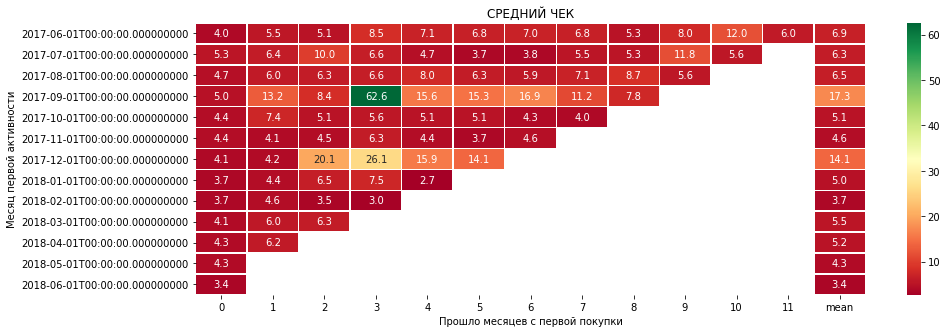

In [97]:
cohorts_revenue_per_order = mean_revenue_cohorts.pivot_table(index = 'first_buy_month', columns = 'lifetime_orders', values = 'mean_revenue')

cohorts_revenue_per_order['mean'] = cohorts_revenue_per_order.mean(axis=1)


plt.figure(figsize=(15, 5))
plt.title('CРЕДНИЙ ЧЕК')
sns.heatmap(cohorts_revenue_per_order, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой покупки')
plt.ylabel('Месяц первой активности');



In [98]:
orders.head()

,uid,revenue,buy_ts,buy_month,first_buy_ts,first_buy_month,first_session_month,lifetime_orders
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [99]:

dynamic_revenue_per_order = orders.groupby(['buy_month', 'lifetime_orders']).agg({'revenue':'sum', 'buy_ts': 'count'}).reset_index()
dynamic_revenue_per_order.columns = ['buy_month', 'lifetime_orders', 'revenue_total', 'n_orders']
dynamic_revenue_per_order

,buy_month,lifetime_orders,revenue_total,n_orders
0,2017-06-01,0,9443.50,2333
1,2017-07-01,0,11503.44,2165
2,2017-07-01,1,981.82,177
3,2017-08-01,0,7206.49,1521
4,2017-08-01,1,644.61,100
...,...,...,...,...
74,2018-05-01,8,474.92,61
75,2018-05-01,9,257.53,46
76,2018-05-01,10,299.36,53
77,2018-05-01,11,519.62,86


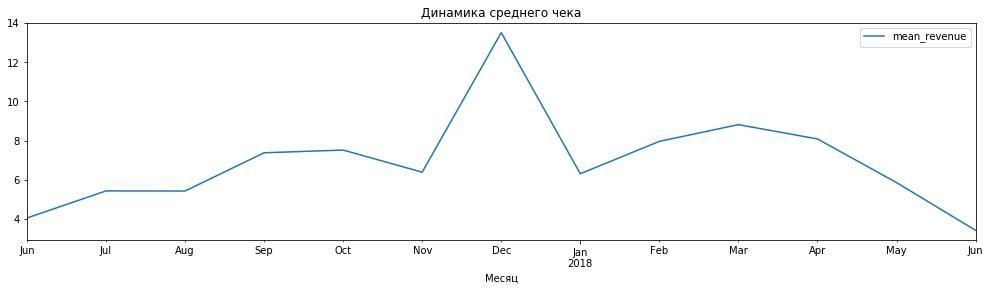

In [100]:
dynamic_revenue_per_order['mean_revenue'] = dynamic_revenue_per_order['revenue_total'] / dynamic_revenue_per_order['n_orders']
dynamic_revenue_mean=dynamic_revenue_per_order.pivot_table(index = 'buy_month', values = 'mean_revenue')


dynamic_revenue_mean.plot(title = 'Динамика среднего чека', figsize = (17,4))
plt.xlabel('Месяц')
plt.show()

In [101]:
print('Средний чек равен {:.2f}'.format(dynamic_revenue_per_order['mean_revenue'].mean()))

Средний чек равен 7.64


### Вывод:
* Средний чек равен 7.64
* С ноября по февраль увеличенный средний чек, видимо это связано с Новым годом и количеством премьер новых фильмов в этот период.
* Средний чек по когортам со временем увеличивается



###  Сколько денег приносят? (LTV) <a id="step2.2.4"></a>

In [102]:
#Сделаем когорты по Lifetime и первому месяцу заказа
orders['age_cohort'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohort_sizes_ltv = orders.groupby('first_buy_month').agg({'uid':'nunique'})
cohort_sizes_ltv.columns = ['cohort_size']
orders_grouped_by_cohorts_ltv = orders.groupby(['first_buy_month', 'age_cohort']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(cohort_sizes_ltv, on='first_buy_month')
orders_grouped_by_cohorts_ltv['ltv'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv['revenue_per_user'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['uid']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
orders_grouped_by_cohorts_ltv

,first_buy_month,age_cohort,revenue,uid,cohort_size,ltv,revenue_per_user
0,2017-06-01,0,9443.50,2003,2003,4.714678,4.714678
1,2017-06-01,1,981.82,61,2003,0.490175,16.095410
2,2017-06-01,2,885.34,50,2003,0.442007,17.706800
3,2017-06-01,3,1931.30,54,2003,0.964204,35.764815
4,2017-06-01,4,2068.58,88,2003,1.032741,23.506591
...,...,...,...,...,...,...,...
74,2018-03-01,2,1114.87,58,3474,0.320918,19.221897
75,2018-04-01,0,10492.17,2244,2244,4.675655,4.675655
76,2018-04-01,1,1209.92,69,2244,0.539180,17.535072
77,2018-05-01,0,13687.07,2942,2942,4.652301,4.652301


In [104]:
#посчитаем LTV по когортам
ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv



age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,4.71,5.20,5.65,6.61,7.64,8.39,9.35,9.93,10.49,11.10,11.68,11.94
2017-07,6.04,6.38,7.01,7.38,7.56,7.71,7.83,7.98,8.14,8.29,8.45,NaN
2017-08,5.30,5.78,6.24,6.64,7.13,7.42,7.63,8.04,8.33,8.52,NaN,NaN
2017-09,5.66,6.79,7.32,11.34,11.74,12.40,13.10,13.35,13.54,NaN,NaN,NaN
2017-10,5.03,5.58,5.77,5.93,6.08,6.20,6.29,6.41,NaN,NaN,NaN,NaN
2017-11,5.16,5.57,5.77,6.10,6.24,6.30,6.41,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,5.01,5.94,7.02,7.34,7.68,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.15,4.44,4.75,4.90,4.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,4.44,4.52,4.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


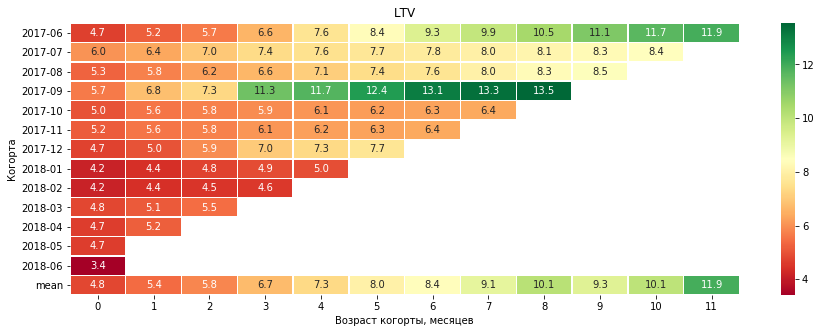

In [105]:
# Выведем тепловую карту
plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

In [106]:
#Посмотрим на выручку с разделением на платформы
visits_by_source = visits.query('start_ts == first_visit')
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})

In [107]:
revenue_by_source_and_device = revenue_by_source_and_device.reset_index()

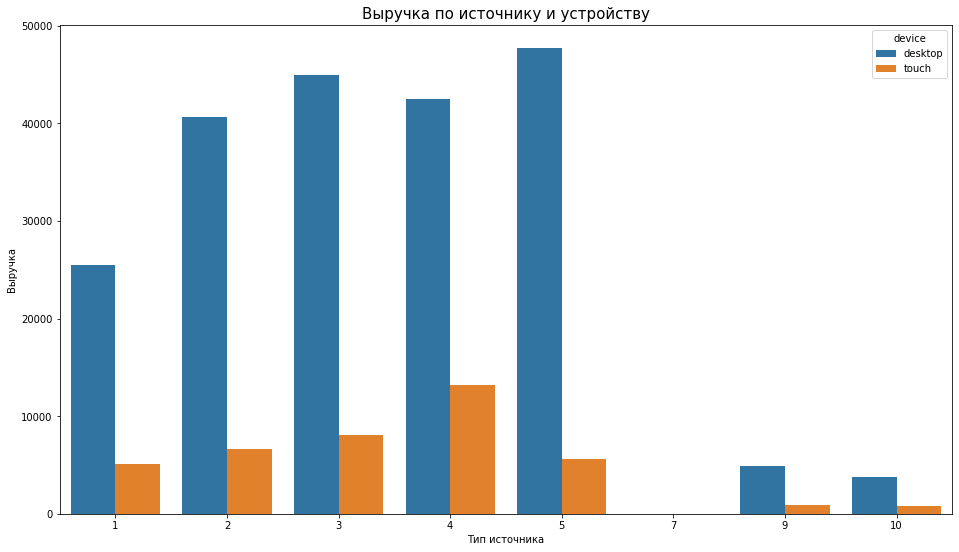

In [108]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Выручка по источнику и устройству', size='15')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Выручка')
plt.show()

## Маркетинг <a id="step2.3"></a>

### Сколько денег потратили? Всего / на каждый источник / по времени? <a id="step2.3.1"></a>

In [109]:
print('ВСЕГО ПОТРАТИЛИ:',costs['costs'].sum())

ВСЕГО ПОТРАТИЛИ: 329131.62


In [110]:
#Сгруппируем по источникам и затратам
cost_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [111]:
#Сделаем столбец с процентными затратами
cost_source['percents'] = (cost_source['costs'] / costs['costs'].sum()) * 100

In [112]:
#Посмотрим расходы по источникам
cost_source.sort_values('percents', ascending = False)

,source_id,costs,percents
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
1,2,42806.04,13.005751
0,1,20833.27,6.329769
6,10,5822.49,1.769046
5,9,5517.49,1.676378


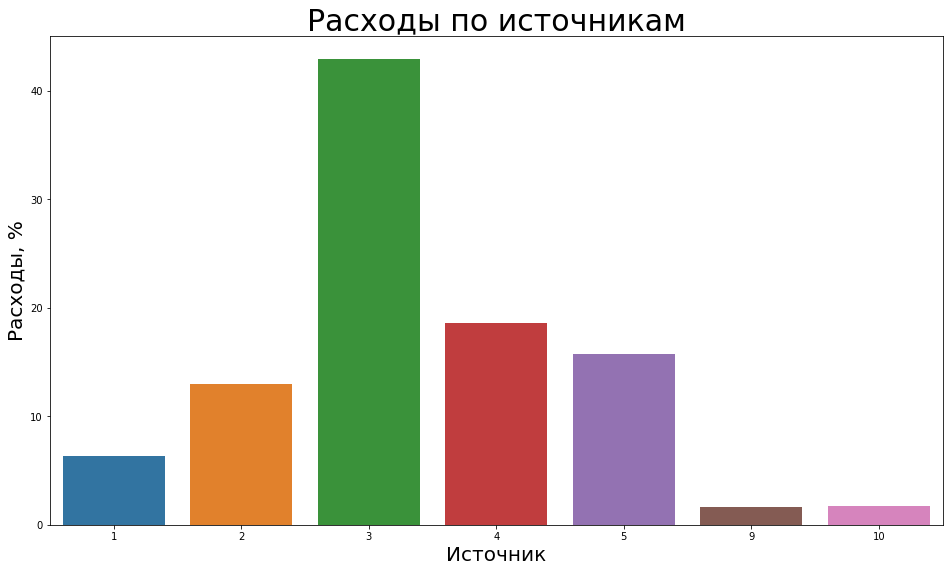

In [113]:
#Выведем на график
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="percents", data=cost_source)
plt.title('Расходы по источникам', size='30')
ax.set_xlabel('Источник', size='20')
ax.set_ylabel('Расходы, %', size='20')
plt.show()


In [114]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [115]:
#Столбец с месяцем и названием
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date


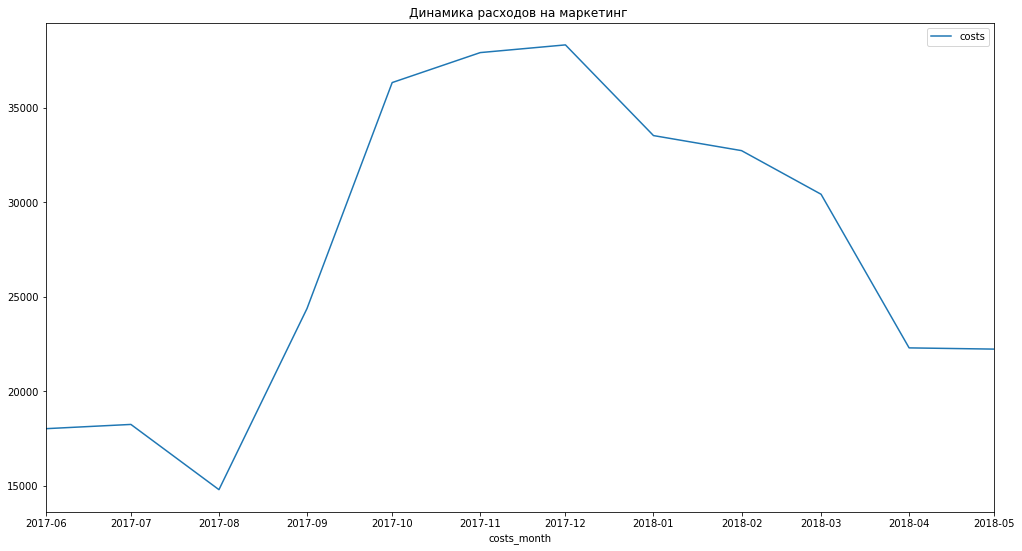

In [116]:
#Посмотрим общую динамику расходов на маркетинг
costs_by_month_total = costs.groupby('costs_month')['costs'].sum().reset_index() 
costs_by_month_total_pivot=costs_by_month_total.pivot_table(index='costs_month',  values='costs')
costs_by_month_total_pivot.plot(figsize = (17,9), title = 'Динамика расходов на маркетинг ');

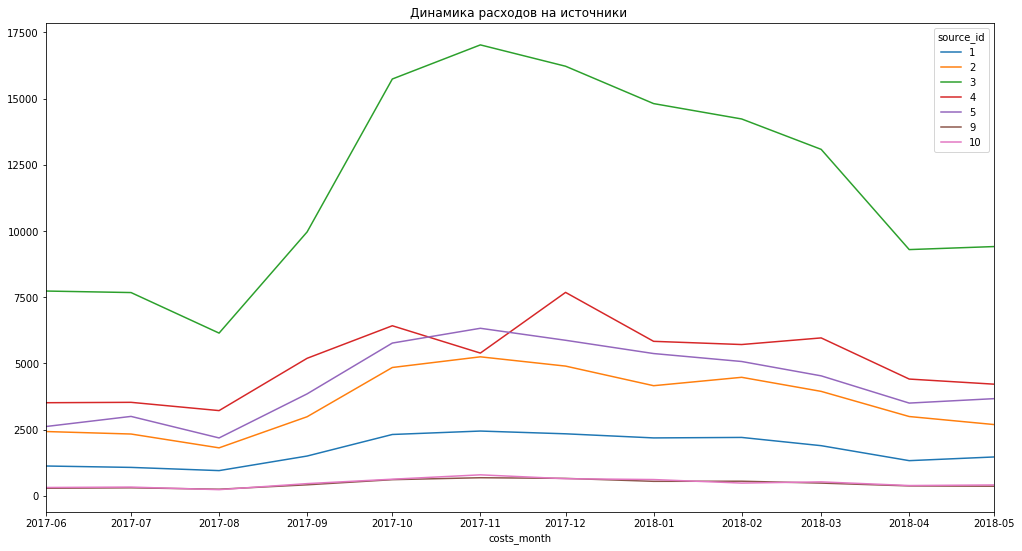

In [117]:
#Также посмотрим на динамику расходов с разделением на источники
costs_by_month = costs.groupby(['costs_month','source_id'])['costs'].sum().reset_index() 
costs_by_month_pivot=costs_by_month.pivot_table(index='costs_month', columns='source_id', values='costs')
costs_by_month_pivot.plot(figsize = (17,9), title = 'Динамика расходов на источники ');


* Всего потратили - **329131.62**
* Самый дорогой источник - **3** (43% всех расходов на маркетинг)
* Период наивысших трат - **Октябрь-Январь**

### Сколько стоило привлечение одного покупателя из каждого источника? <a id="step2.3.2"></a>

In [118]:
#Сгруппируем покупки по источникам
visits_by_source = visits.query('start_ts == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'}).reset_index()
customers_by_source

,source_id,customers
0,1,2964
1,2,3515
2,3,10248
3,4,10113
4,5,6847
5,7,1
6,9,1087
7,10,1306


In [119]:
#Сгруппируем затраты по источникам
cost_source = costs.groupby('source_id').agg({'costs':'sum'})
cost_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [120]:
#Объеденим затраты и количество покупателей
customers_costs = pd.merge(customers_by_source, cost_source, on='source_id')
customers_costs

,source_id,customers,costs
0,1,2964,20833.27
1,2,3515,42806.04
2,3,10248,141321.63
3,4,10113,61073.60
4,5,6847,51757.10
5,9,1087,5517.49
6,10,1306,5822.49


In [121]:
#Посчитаем затраты на покупателя из каждого источника
customers_costs['cac']=customers_costs['costs']/customers_costs['customers']
customers_costs.sort_values(by='cac', ascending=False)

,source_id,customers,costs,cac
2,3,10248,141321.63,13.790167
1,2,3515,42806.04,12.178105
4,5,6847,51757.10,7.559092
0,1,2964,20833.27,7.028769
3,4,10113,61073.60,6.039118
5,9,1087,5517.49,5.075888
6,10,1306,5822.49,4.458262


In [122]:
customers_costs=customers_costs.sort_values(by='cac')

In [123]:
customers_costs = customers_costs.fillna(0)

In [124]:
#Сделаем сводную таблицу 
cac=customers_costs.pivot_table(index='source_id', values='cac')

In [125]:
#Отсортируем
cac=cac.sort_values(by='cac')

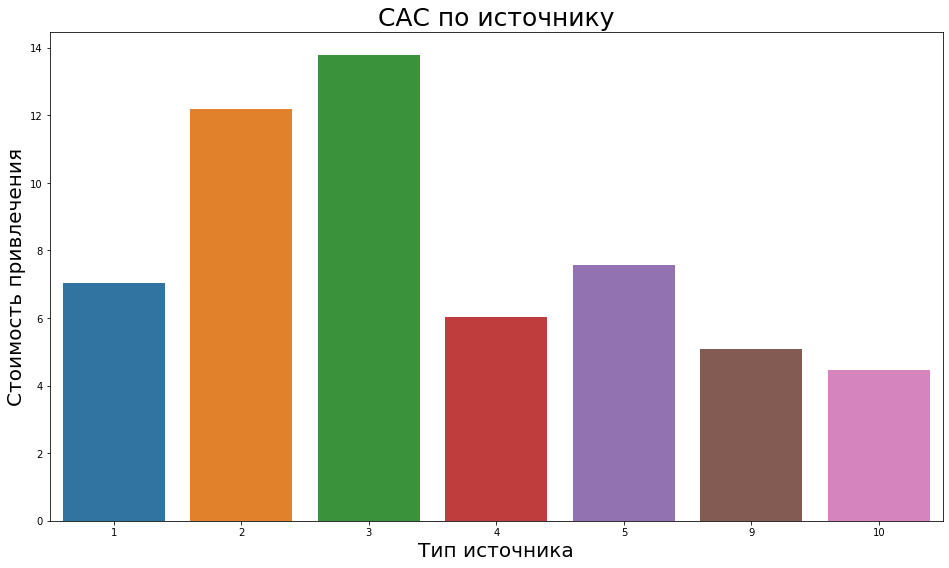

In [126]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=customers_costs)
plt.title('CAC по источнику', size='25')
ax.set_xlabel('Тип источника', size='20')
ax.set_ylabel('Стоимость привлечения', size='20')
plt.show()

* Источник 3 = **13.79** - на него уходят основные деньги маркетинга, а стоимость привлечения самая высокая.
* При этом средний чек - **7,64**
* Если исходить из положительной разницы среднего чека и стоимости привлечения клиента - реклама в источниках 2 и 3 не окупается.


### На сколько окупились расходы? (ROI) <a id="step2.3.3"></a>

In [127]:
#Посмотрим выручку по источникам
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source

,revenue
source_id,
1,30537.37
2,47265.19
3,53061.62
4,55601.15
5,53352.23
7,1.22
9,5746.85
10,4611.73


In [128]:
#Посчитаем ROI
roi = revenue_by_source.join(cost_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

In [129]:
roi.sort_values('roi', ascending = False)

,revenue,costs,roi
source_id,,,
1,30537.37,20833.27,0.465798
2,47265.19,42806.04,0.104171
9,5746.85,5517.49,0.041570
5,53352.23,51757.10,0.030820
4,55601.15,61073.60,-0.089604
10,4611.73,5822.49,-0.207945
3,53061.62,141321.63,-0.624533
7,1.22,NaN,NaN


In [130]:
roi.revenue.sum()

250177.36000000546

In [131]:
roi_pivot=roi.pivot_table(index='source_id', values='roi')

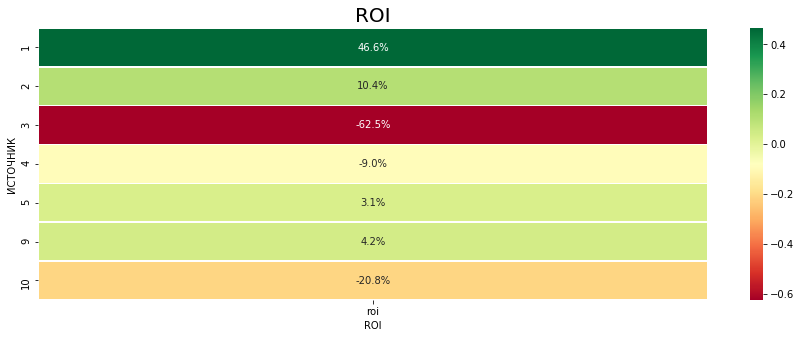

In [132]:
plt.figure(figsize=(15, 5))
plt.title('ROI', size='20')
sns.heatmap(roi_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('ROI', size='10')
plt.ylabel('ИСТОЧНИК', size='10')
plt.show()

In [133]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.set_index('first_buy_month')

In [134]:
orders_grouped_by_cohorts_ltv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2017-06-01 to 2018-06-01
Data columns (total 6 columns):
age_cohort          79 non-null int64
revenue             79 non-null float64
uid                 79 non-null int64
cohort_size         79 non-null int64
ltv                 79 non-null float64
revenue_per_user    79 non-null float64
dtypes: float64(3), int64(3)
memory usage: 4.3 KB


In [135]:
costs_by_month = costs.pivot_table(index = 'costs_month', values = 'costs', aggfunc = 'sum').reset_index()


In [136]:
costs_by_month.columns = ['first_buy_month', 'costs']


In [137]:
costs_by_month['first_buy_month'] = pd.to_datetime(costs_by_month['first_buy_month'], format = '%Y.%m.%d')

In [138]:
costs_by_month = costs_by_month.set_index('first_buy_month')

In [139]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(costs_by_month, on = 'first_buy_month')

In [140]:
orders_grouped_by_cohorts_ltv['cac'] = orders_grouped_by_cohorts_ltv['costs'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv['romi'] = orders_grouped_by_cohorts_ltv['ltv'] / orders_grouped_by_cohorts_ltv['cac']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv[:-1]
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.reset_index()

In [141]:
orders_grouped_by_cohorts_ltv

,first_buy_month,age_cohort,revenue,uid,cohort_size,ltv,revenue_per_user,costs,cac,romi
0,2017-06-01,0,9443.50,2003,2003,4.714678,4.714678,18015.00,8.994009,0.524202
1,2017-06-01,1,981.82,61,2003,0.490175,16.095410,18015.00,8.994009,0.054500
2,2017-06-01,2,885.34,50,2003,0.442007,17.706800,18015.00,8.994009,0.049145
3,2017-06-01,3,1931.30,54,2003,0.964204,35.764815,18015.00,8.994009,0.107205
4,2017-06-01,4,2068.58,88,2003,1.032741,23.506591,18015.00,8.994009,0.114825
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,1,1063.05,90,3474,0.306002,11.811667,30415.27,8.755115,0.034951
74,2018-03-01,2,1114.87,58,3474,0.320918,19.221897,30415.27,8.755115,0.036655
75,2018-04-01,0,10492.17,2244,2244,4.675655,4.675655,22289.38,9.932879,0.470725
76,2018-04-01,1,1209.92,69,2244,0.539180,17.535072,22289.38,9.932879,0.054282


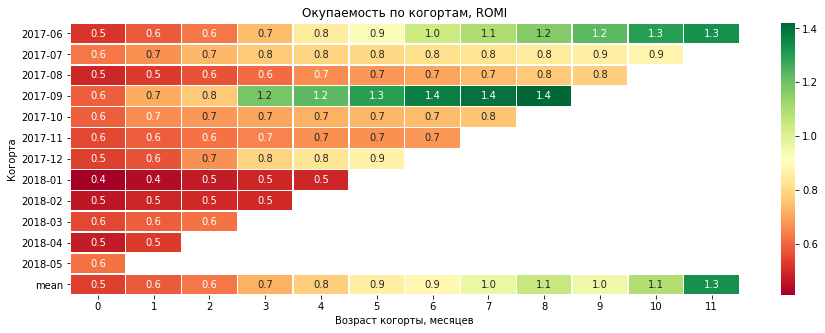

In [142]:
romi = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'romi', aggfunc = 'mean')

romi = romi.cumsum(axis=1)
romi = romi.reset_index()
romi['first_buy_month'] = romi['first_buy_month'].dt.strftime('%Y-%m')
romi = romi.set_index('first_buy_month')
romi.loc['mean'] = romi.mean()
romi = romi.round(2)

plt.figure(figsize=(15, 5))
plt.title('Окупаемость по когортам, ROMI')
sns.heatmap(romi, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()





* В среднем окупаемость по когортам начинается не ранее 7 месяца их жизни.
* Необходимо отдельно изучить когорту, 20% прибыли уже на 4-ый месяц

# Общий вывод <a id="step3"></a>

## Продукт 
### [Сколько людей пользуются в день, неделю, месяц?](#step2.1.1)
 
* Пользователей в день: **817** 
* Пользователей в неделю: **5148** 
* Пользователей в месяц: **20955** 
-------------------------------------
* Пользователей в день **desktop: 599** 
* Пользователей в неделю **desktop: 3756** 
* Пользователей в месяц **desktop: 15239** 
-------------------------------------
* Пользователей в день **touch: 221** 
* Пользователей в неделю **touch: 1433** 
* Пользователей в месяц **touch: 5999**

* В динамике за весь период наблюдается сезонность. Снижение активности в летнее время и повышенная активность в осенне-зимний период. Это может быть связано с количеством кинопремьер, их количество обычно выше в данный период. А также с погодой, прогулки на улице для многих могут быть некомфортными.  

##### Пользователи стационарных устройств:
* Лояльность/вовлечённость за неделю: 15.96%
* Лояльность/вовлечённость за месяц: 3.94%

##### Пользователи мобильных устройств
* Лояльность/вовлечённость за неделю: 15.44%
* Лояльность/вовлечённость за месяц: 3.69%

* Видно, что частота использования невысокая.

### [Сколько сессий в день?](#step2.1.2)
* Сессий в день в среднем: 889
* Количество сессий также подвержено сезонности если смотреть на динамику
* Есть аномально высокий показатель сессий в декабре 2017 (3755 сессий) и аномально низкий в апреле 2018 (1 сессия, возможно технические проблемы с площадкой).


### [Сколько длится одна сессия?](#step2.1.3)

* Длительность сессии - среднее: 714
* Длительность сессии - медиана: 360
* Длительность сессии - мода: 60

* Длительность сессии на стационарных устройствах - среднее: 773
* Длительность сессии на стационарных устройствах - медиана: 420
* Длительность сессии на стационарных устройствах - мода: 60

* Длительность сессии на мобильных устройствах - среднее: 548
* Длительность сессии на мобильных устройствах - медиана: 240
* Длительность сессии на мобильных устройствах - мода: 60

* Чаще всего люди проводят 60 секунд на сайте
* Для стационарных устройств характерно большее кол-во "длинных" сессий


### [Как часто люди возвращаются?](#step2.1.4)

* Всего порядка 6-7% пользователей продолжают пользоваться на следующий месяц
* Показатель использования сервиса по когортам со временем падает
* Можно сказать, что сайт "одноразовый" для большинства пользователей

## [Продажи](#step2.2)

### [Когда люди начинают покупать?](#step2.2.1)
* Медиана времени первой покупки: **15 минут**
* Среднее времени первой покупки: **15 дней**
* Мода времени первой покупки: **1 минута**
* Чаще всего люди начинают покупать сразу после первой сессии

### [Сколько раз покупают за период?](#step2.2.2)

##### В среднем на одного пользователя покупок:
* В день - **1.08**,
* В неделю - **1.16**,
* В месяц - **1.23**,
* В год - **1.32**
* Динамика покупок подтверждает сезонность, выявленную ранее
* Стационарные устройства значительно популярнее мобильных для "Яндекс.Афиши"
* Динамика покупок через мобильные устройства значительно ниже и практически не подвержена сезонности.

### [Какой средний чек?](#step2.2.3)

* Средний чек равен **7.64**
* С ноября по февраль увеличенный средний чек, видимо это связано с Новым годом и количеством премьер новых фильмов в этот период.
* Средний чек по когортам со временем увеличивается

### [Сколько денег приносят? (LTV)](#step2.2.4)

* LTV одного клиента на первый месяц составляет **4,8**
* В течение года данный показатель в среднем увеличивается в  **2 раза**
* Выручка по пользователям стационарных устройств значительно выше

## [Маркетинг](#step2.3)

### [Сколько денег потратили? Всего / на каждый источник / по времени](#step2.3.1)

* ВСЕГО ПОТРАТИЛИ: **329131.62** (100%)

* Источник 1: **20833.27**	(6.33%)
* Источник 2: **42806.04**	(13.00%)
* Источник 3: **141321.63**	(42.94%)
* Источник 4: **61073.60**	(18.56%)
* Источник 5: **51757.10**	(15.72%)
* Источник 9: **5517.49**	(1.68%)
* Источник 10: **5822.49**	(1.77%)

* По источнику **3** наблюдается сильное сезонное увеличение затрат (сентябрь-март)
* По источникам **2,4,5** наблюдается среднее сезонное увеличение затрат (сентябрь-март)
* По источнику **1** наблюдается умеренное сезонное увеличение затрат (сентябрь-март)
* По источникам **9,10** колебания затрат практически незаметны в течение года.

### [Сколько стоило привлечение одного покупателя из каждого источника?](#step2.3.2)

* Стоимость привлечения одного покупателя по **источнику 3 - 13.79**
* Стоимость привлечения одного покупателя по **источнику 2 - 12.18**
* Стоимость привлечения одного покупателя по **источнику 5 - 7.56**
* Стоимость привлечения одного покупателя по **источнику 1 - 7.03**
* Стоимость привлечения одного покупателя по **источнику 4 - 6.04**
* Стоимость привлечения одного покупателя по **источнику 9 - 5.07**
* Стоимость привлечения одного покупателя по **источнику 10 - 4.46**
* Источник 3 = **13.79** - на него уходят основные деньги маркетинга, а стоимость привлечения самая высокая.
* При этом средний чек - **7,64**
* Если исходить из положительной разницы среднего чека и стоимости привлечения покупателя - реклама в источниках **2 и 3** не окупается.

### [На сколько окупились расходы? (ROI)](#step2.3.3)

##### Источник 1:
* Выручка - **30537.37**
* Затраты - **20833.27**
* Окупаемость инвестиций (ROI) - **46,6%**

##### Источник 2:
* Выручка - **47265.19**
* Затраты - **42806.04**
* Окупаемость инвестиций (ROI) - **10,4%**

##### Источник 3:
* Выручка - **53061.62**
* Затраты - **141321.63**
* Окупаемость инвестиций (ROI) - **-62,5%**

##### Источник 4:
* Выручка - **55601.15**
* Затраты - **61073.60**
* Окупаемость инвестиций (ROI) - **-9,0%**

##### Источник 5:
* Выручка - **53352.23**
* Затраты - **51757.10**
* Окупаемость инвестиций (ROI) - **3,1%**

##### Источник 7:
* Выручка - **1,22**
* Затраты - **0**
* Окупаемость инвестиций (ROI) - **0%**

##### Источник 9:
* Выручка - **5746.85**
* Затраты - **5517.49**
* Окупаемость инвестиций (ROI) - **4,2%**

##### Источник 10:
* Выручка - **4611.73**
* Затраты - **5822.49**
* Окупаемость инвестиций (ROI) - **-20,8%**

##### Также стоит учитывать:
* В среднем окупаемость по когортам начинается не ранее 7 месяца их жизни.
* Есть отдельные когорта 2017-09, положительные показатели уже на 4-ый месяц.

# Куда и сколько стоит вкладывать денег?

##### Текущая экономика по маркетингу отрицательная
* Видно, что наибольшие затраты - вложение в **источник 3** (Почти 43% всего бюджета на маркетинг, при самом дорогом САС - 13,5 и отрицательном ROI) от этого источника следует отказаться, либо оптимизировать расходы по нему.
* Общая выручка - 250177.36
* Общие затраты: - 329131.62
##### Необходимо полностью пересмотреть затраты с учётом рекомендаций, обозначенных ниже
### Рекомендуемые источники/платформы:

##### Платформа - desktop, аргументы:
* В 3 раза больше пользователей по сравнению с touch
* В среднем сессии длятся дольше, чем на touch устройствах

##### Источник 1 - главный претендент на вложения, аргументы
* Стоимость привлечения одного покупателя - **7.03**
* Это ниже общего среднего чека - **7,64**
* Самый высокий показатель окупаемости вложений (ROI) - **46,6%**
* Если бы основные вложения были бы именно в этот канал и другие, более дешёвые каналы с , то с учётом LTV когорт пользователей, сервис уже окупился бы и начал приносить прибыль от маркетинговых вложений 
##### Также стоит учитывать источники 5 и 9
* У них положительный ROI, а CAC ниже среднего чека (7.56 и 5.07)

##### Дополнительно 
* Исследовать источник трафика 7, при отсутствии вложений, есть прибыль, хоть и небольшая (Маркетинг без бюджета это чистая выручка!)
* Отдельно исследовать когорту 2017-09, пользователи данной когорты имеют большую выручку для компании и сильно выбиваются из общей динамики.

